In [57]:
import math
import numpy
import scipy
import matplotlib
import matplotlib.pyplot as plt
import pandas

import os
import settings

## Data

In [58]:
# Helper function to make a path to data file.
def dataFilePath(filename):
    return os.path.join(settings.dataFolder, filename)

In [59]:
dataFrame = pandas.read_excel(dataFilePath("data.xls"))
print(dataFrame)

      15-19  20-24  25-29  30-34  35-39  40-44  45-49
2012      8     90    160    275    227    187     98
2013     10    134    244    322    242    191    113
2014     20    201    272    356    306    171    141
2015     55    202    303    355    321    194    117
2016     70    253    320    371    332    201    114


In [60]:
populationFrame = pandas.read_excel(dataFilePath("population2012_2016.xls"))
print(populationFrame)

      15-19  20-24  25-29  30-34  35-39  40-44  45-49
2012   6174   6699   7254   7677   7264   7142   7739
2013   6071   6787   7190   7910   7534   6932   7748
2014   5966   6795   7296   7918   7723   6932   7590
2015   5912   6982   7672   8070   7827   7054   7423
2016   6034   7068   8089   8155   8043   7181   7360


In [61]:
implantsFrame = pandas.read_excel(dataFilePath("implants2012_2016.xls"))
print(implantsFrame)

      15-19  20-24  25-29  30-34  35-39  40-44  45-49
2012      0     53     64     40     28     12      3
2013     37    125    101     85     39     18     10
2014     31    146     90     84     30     14      5
2015     89    175     94     79     52     23     12
2016    112    155    105     72     47     30     10


In [62]:
# Define columns and rows (index) for reuse. 
columns = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]
index = [2012, 2013, 2014, 2015, 2016]

# Calculate derived data.
relativeIudsFrame = dataFrame / populationFrame
relativeImplantsFrame = implantsFrame / populationFrame
iudSumFrame = dataFrame.sum(axis = 1)
implantSumFrame = implantsFrame.sum(axis = 1)

## Plots

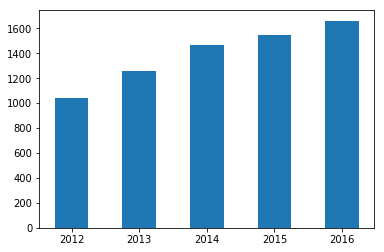

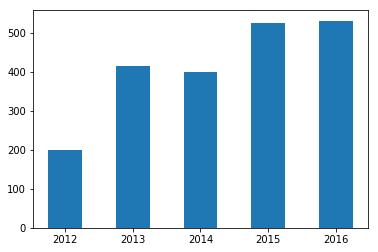

In [63]:
def plotSum(frame, filename):
    x = frame.index.tolist()
    plt.bar(x, frame.tolist(), width = 0.5, color = 'tab:blue')
    plt.savefig('%s.pdf' % filename, format='pdf')
    plt.savefig('%s.svg' % filename, format='svg')
    plt.show()
    
plotSum(iudSumFrame, 'total_iuds')
plotSum(implantSumFrame, 'total_implants')

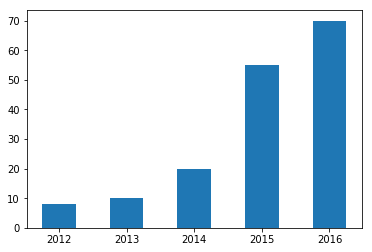

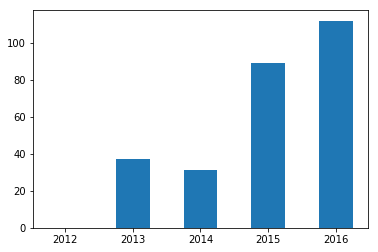

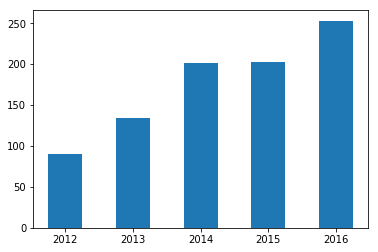

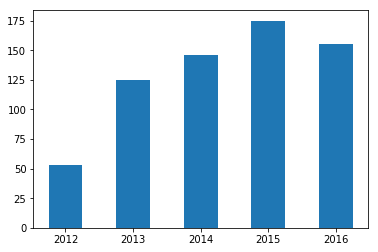

In [64]:
columnSubset = ["15-19", "20-24"]
for column in columnSubset:
    x = dataFrame.index.tolist()
    plt.bar(x, dataFrame[column].tolist(), width = 0.5, color = 'tab:blue')
    plt.savefig('iuds_{0}.pdf'.format(column), format='pdf')
    plt.show()
    
    x = implantsFrame.index.tolist()
    plt.bar(x, implantsFrame[column].tolist(), width = 0.5, color = 'tab:blue')
    plt.savefig('implants_{0}.pdf'.format(column), format='pdf')
    plt.show()
    

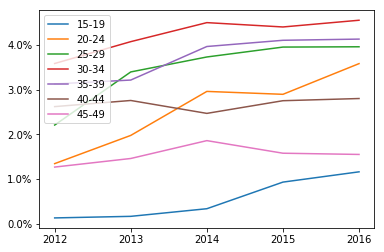

In [65]:
def percentageFormat(x, _):
    return "%.1f%%" % (100 * x) 

def plotRelativeFrame(frame, filename):
    axes = frame.plot(kind = "line", xticks = index)
    axes.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(percentageFormat))
    handles, labels = axes.get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper left')
    plt.savefig('%s.svg' % filename, format='svg')
    plt.show()    

plotRelativeFrame(relativeIudsFrame, 'relative_iuds')

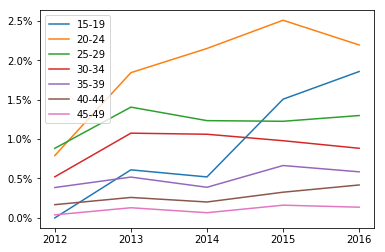

In [66]:
plotRelativeFrame(relativeImplantsFrame, 'relative_implants')